In [88]:
import tests
import oracles
import methods
import plot_trajectory_2d
import numpy as np
import random
import scipy as sp
import matplotlib.pyplot as plt
from scipy.sparse import diags
import pandas as pd
from sklearn.datasets import load_svmlight_file
from tqdm.notebook import tqdm
%matplotlib inline

# 2.1 Проверка реализованных методов

In [2]:
test_v = tests.TestVersion()

test_v.test_python3()

In [3]:
test_quad = tests.TestQuadratic()

test_quad.test_QuadraticOracle()

In [4]:
test_logreg = tests.TestLogReg()

test_logreg.test_log_reg_usual()
test_logreg.test_log_reg_oracle_calls()

In [5]:
test_line_search = tests.TestLineSearch()

test_line_search.test_line_search()


In [6]:
test_grad = tests.TestGradientDescent()

test_grad.test_gd_basic()
test_grad.test_gd_1d()

/home/dm/Документы/MADE/2 семетстр/оптимизация/hw2/made_opt_in_ml-master/homework_2/methods.py:206: RuntimeWarning: invalid value encountered in double_scalars
  if grad_norm_k / grad_norm_0 <= self.tolerance:


# 2.2 Траектория градиентного спуска на квадратичной функции.

A = [[1.1 0. ]
 [0.  1. ]], b=[0. 0.], x_0=[-2.50919762  9.01428613]
Число обусловленности=1.1


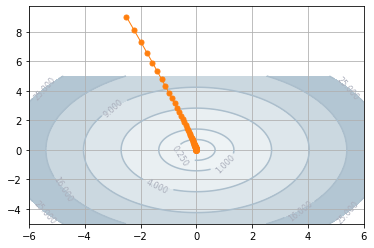

Метод оптимизации: Constant
Решение : [-7.63915974e-06  9.27608817e-05]
Количество итераций: 110
------------------------------//--------------------------------------


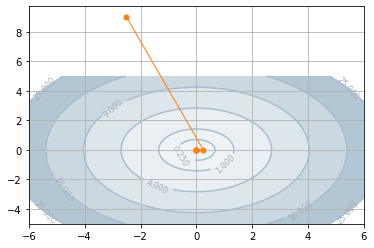

Метод оптимизации: Armijo
Решение : [2.50919762e-05 0.00000000e+00]
Количество итераций: 6
------------------------------//--------------------------------------


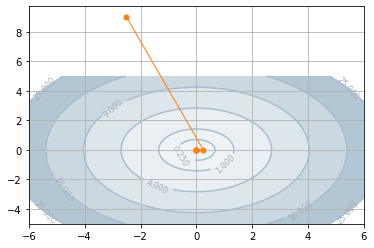

Метод оптимизации: Wolfe
Решение : [2.50919762e-05 0.00000000e+00]
Количество итераций: 6
------------------------------//--------------------------------------
A = [[3.2 0. ]
 [0.  1. ]], b=[0. 0.], x_0=[4.63987884 1.97316968]
Число обусловленности=3.2


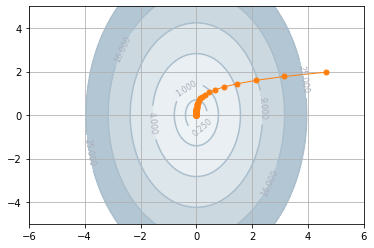

Метод оптимизации: Constant
Решение : [2.6596084e-15 1.3527975e-04]
Количество итераций: 92
------------------------------//--------------------------------------


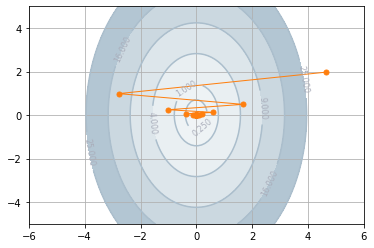

Метод оптимизации: Armijo
Решение : [-3.66425255e-05  2.35220156e-07]
Количество итераций: 24
------------------------------//--------------------------------------


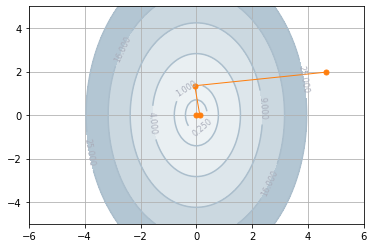

Метод оптимизации: Wolfe
Решение : [-1.38777878e-17  0.00000000e+00]
Количество итераций: 4
------------------------------//--------------------------------------
A = [[20  0]
 [ 0  2]], b=[0. 0.], x_0=[-6.87962719 -6.88010959]
Число обусловленности=10.0


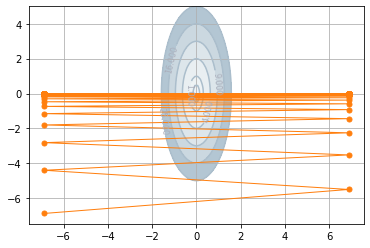

Метод оптимизации: Constant
Решение : [-6.87962719e+00 -8.46413045e-97]
Количество итераций: 1001
------------------------------//--------------------------------------


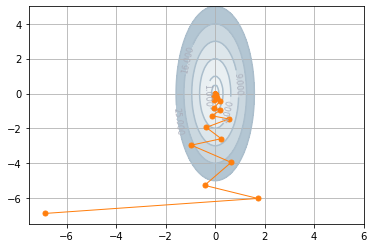

Метод оптимизации: Armijo
Решение : [-3.78763123e-05 -5.00893057e-04]
Количество итераций: 39
------------------------------//--------------------------------------


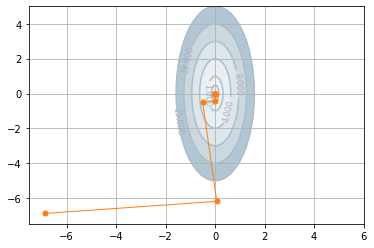

Метод оптимизации: Wolfe
Решение : [ 1.81254345e-06 -1.81241637e-04]
Количество итераций: 10
------------------------------//--------------------------------------


In [96]:
np.random.seed(42)
A1 = np.array([[1.1, 0], [0,1]])
A2 = np.array([[3.2, 0], [0,1]])
A3 = np.array([[20, 0], [0,2]])
arr = [A1, A2, A3]
b = np.zeros(2)
results_1=[]
for A in arr:
    oracle = oracles.QuadraticOracle(A, b)
    x_0 = np.random.uniform(-10, 10, size=2)
    print(f"A = {A}, b={b}, x_0={x_0}", sep='\n',)
    print(f"Число обусловленности={np.linalg.cond(A)}", )  
    optParamDict = {'method': None,
                    'c' : 0.1}
    for method in ['Constant', 'Armijo', 'Wolfe']:
        optParamDict['method'] = method
        params = methods.get_line_search_tool(optParamDict)
        x_star, history = methods.GradientDescent(oracle,x_0,line_search_options=params).run()   
        plot_trajectory_2d.plot_levels(oracle.func)
        plot_trajectory_2d.plot_trajectory(oracle.func, history=history['x'])
        plt.show()
        print(f"Метод оптимизации: {optParamDict['method']}", )
        print(f"Решение : {x_star}")
        print(f"Количество итераций: {len(history['x'])}", ) 
        print('------------------------------//--------------------------------------')
        results_1.append(
            {'Число обусловленности':np.linalg.cond(A), 
             'Метод оптимизации':method, 
             'Решение':x_star,
             'Количество итераций':(len(history['x']))})

In [97]:
results_1=pd.DataFrame(results_1)
results_1

,Число обусловленности,Метод оптимизации,Решение,Количество итераций
0,1.1,Constant,"[-7.639159744263318e-06, 9.276088171425391e-05]",110
1,1.1,Armijo,"[2.5091976230527603e-05, 0.0]",6
2,1.1,Wolfe,"[2.5091976230527603e-05, 0.0]",6
3,3.2,Constant,"[2.6596084003312878e-15, 0.0001352797503903947]",92
4,3.2,Armijo,"[-3.6642525482761206e-05, 2.3522015618571424e-07]",24
5,3.2,Wolfe,"[-1.3877787807814457e-17, 0.0]",4
6,10.0,Constant,"[-6.879627191151272, -8.46413044961501e-97]",1001
7,10.0,Armijo,"[-3.787631229860042e-05, -0.0005008930566953111]",39
8,10.0,Wolfe,"[1.8125434538502694e-06, -0.00018124163665122353]",10


### Вывод

Можно заметить, что для $\forall \kappa$ количество итераций, необходимое константному алгоритму максимально по сравнению с другими методами. Данный метод не способен "адаптироваться" под выбор начальной точки и ему очень сложно не "промахнуться" близ целевой точки.
Методам Армихо и Вульфа требуется меньшее количество итераций. Вцелом, методу Вульфа требуется небольше итераций, чем методу Армихо. 
Можно заметить, что с ростом значения $\kappa$ наблюдается особенность поведения градиентных методов, заключающаяся в большом количестве "маленьких шагов". 

# 2.3 Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Построим график зависимости количества итераций $N(n, \kappa)$ при размерности пространства $n\in [10, 10000]$ от значения числа обусловленности целевой функции $\kappa \in [1,1000]$. Изобразим на графике кривые $t_{ni}$ из семейства кривых $T_n$ и усредненную кривую для каждого из семеств $T_n$. Был использован метод Вульфа.


CPU times: user 1min 30s, sys: 152 ms, total: 1min 30s
Wall time: 1min 30s


Text(0.5, 0, 'Число обусловленности целевой функции $\\kappa$')

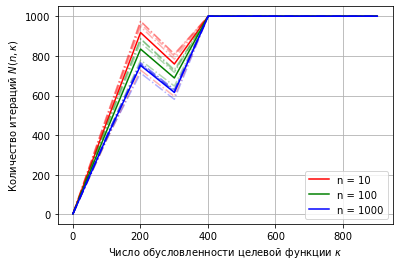

In [95]:
%%time
ns = [10, 100, 1000]
colors = ['r', 'g', 'b', 'm']
kappas = list(range(1, 1000, 100))
number_of_samples = 5
T = {}
for n, color in tqdm(zip(ns, colors)):
    T[n] = [[] for _ in range(number_of_samples)]
    for i in range(number_of_samples):
        for kappa in kappas:
            np.random.seed(i)
            diag = np.random.uniform(low=1, high=kappa, size=n)
            diag[0], diag[-1] = 1, kappa
            A = diags(diag)
            A = A.toarray()
#             print(A.shape)
            b = np.random.uniform(low=1, high=kappa, size=n)
            oracle = oracles.QuadraticOracle(A, b)
            __, history = methods.GradientDescent(oracle,
                                                      np.zeros(n),
                                                      line_search_options=methods.get_line_search_tool(
                                                          {'method': 'Armijo'})).run(max_iter=1000)
            T[n][i].append(len(history['func']))
        plt.plot(kappas, T[n][i], color=color, alpha=0.3, linestyle = '-.')
    plt.plot(kappas, np.mean(T[n], axis=0), color=color, label='n = {}'.format(n))
plt.legend()
plt.grid()
plt.ylabel('Количество итераций $N(n, \kappa)$')
plt.xlabel('Число обусловленности целевой функции $\kappa$');

### Результаты и выводы 
1. В целом, характер поведения усредненных кривых схож для различных значений $n$, что может свидетельствовать либо об отсутствии зависимости между N и n, либо о наличии крайне слабой зависимости, далекой от линейной. 
2. Зависимость количества итераций N от число обусловленности целевой функции $\kappa$ наблюдается. Можно заметить, что с ростом значения $\kappa$ растет и количество итераций $N$ для $\forall n$, зависимость похожа на линейную. Указанные выводы согласуются с теорией.

Можем подвести итог, что для быстрой работы метода хотелось бы иметь малое значение числа обусловленности и хорошие начальные условия, чтобы избегать "зигзагов" и "маленьких" верных шагов в траектории. Многовато хотим... Зато знаем, когда лучше не использовать подобные методы.

# 2.4

## Датасет a9a

In [10]:
def prepare_data(dataset):
    filename = dataset + ".txt"

    data = load_svmlight_file(filename)
    A, y = data[0], data[1]
    m, n = A.shape
    
    if (2 in y) & (1 in y):
        y = 2 * y - 3
    if (2 in y) & (4 in y):
        y = y - 3
    assert((-1 in y) & (1 in y))
    
    sparsity_A = A.count_nonzero() / (m * n)
    return A, y, m, n, sparsity_A

In [82]:
dataset = "a9a"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Число функций в сумме: ", m, ", размерность задачи: ", n)

Число функций в сумме:  32561 , размерность задачи:  123


In [83]:
a9a_oracle = oracles.create_log_reg_oracle(A, y, 1/m)
x_0 = np.random.uniform(-10, 10, size=n)

In [84]:
a9a_logreg_1 = methods.GradientDescent(oracle=a9a_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Armijo',
                                                    'alpha_0': 100,
                                                    'c1': 0.3
                                                    })

a9a_logreg_2 = methods.GradientDescent(oracle=a9a_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Wolfe',
                                                    'c2': 0.9,
                                                    'c1': 1e-4
                                                    })

a9a_logreg_3 = methods.GradientDescent(oracle=a9a_oracle, x_0=x_0, 
                                line_search_options={'method': 'Constant', 'c': 1})

In [85]:
%%time
a9a_run_1 = a9a_logreg_1.run(max_iter=1000)

a9a_run_2 = a9a_logreg_2.run(max_iter=1000)

a9a_run_3 = a9a_logreg_3.run(max_iter=1000)

CPU times: user 24.4 s, sys: 0 ns, total: 24.4 s
Wall time: 24.4 s


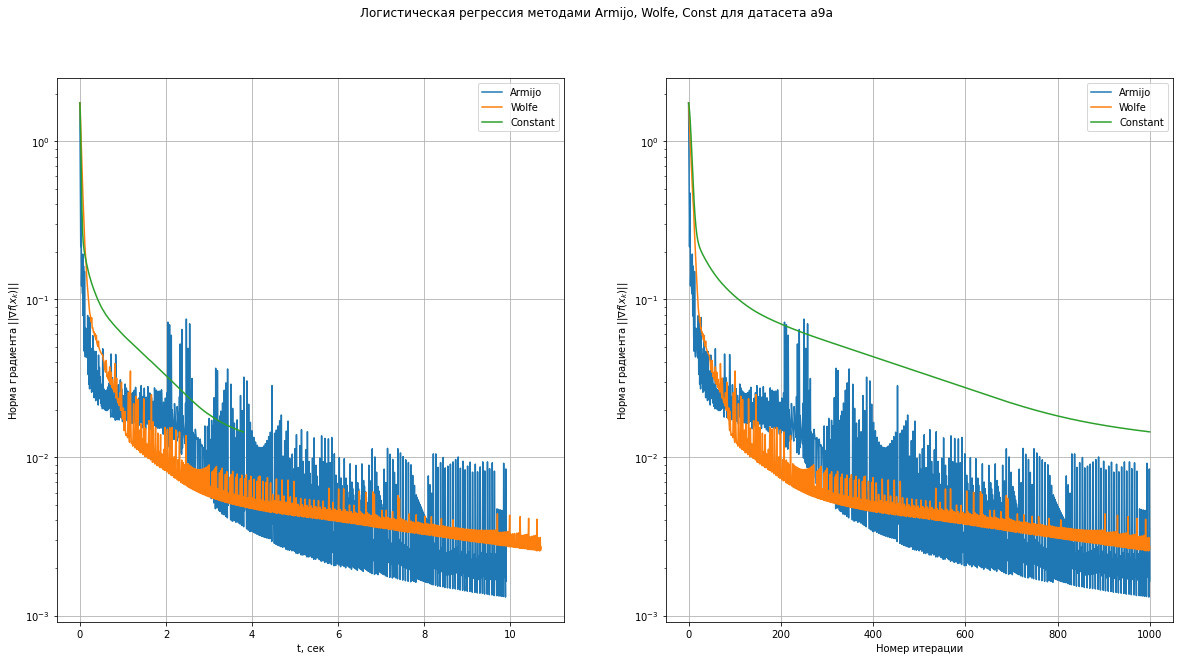

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

title = "Логистическая регрессия методами Armijo, Wolfe, Const для датасета " + dataset

fig.suptitle(title)

ax1.plot(a9a_logreg_1.hist['time'],
         a9a_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax1.plot(a9a_logreg_2.hist['time'],
         a9a_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax1.plot(a9a_logreg_3.hist['time'],
         a9a_logreg_3.hist['grad_norm'],
         label = "Constant")



ax2.plot(a9a_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax2.plot(a9a_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax2.plot(a9a_logreg_3.hist['grad_norm'],
         label = "Constant")



ax1.grid()
ax1.semilogy()
ax1.legend()
ax1.set_xlabel("t, сек")
ax1.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")

ax2.grid()
ax2.legend()
ax2.semilogy()
ax2.set_xlabel("Номер итерации")
ax2.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")


plt.show()

Лучший результат у Armijo, затем идет Wolfe и Const нужно значительно больше итераций

## Датасет gisette

In [69]:
dataset = "gisette"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Число функций в сумме: ", m, ", размерность задачи: ", n)

Число функций в сумме:  6000 , размерность задачи:  5000


In [70]:
gisette_oracle = oracles.create_log_reg_oracle(A, y, 1/m)

x_0 = np.random.uniform(-10, 10, size=n)

In [71]:
gisette_logreg_1 = methods.GradientDescent(oracle=gisette_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Armijo',
                                                    'alpha_0': 100,
                                                    'c1': 0.3
                                                    })

gisette_logreg_2 = methods.GradientDescent(oracle=gisette_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Wolfe',
                                                    'c2': 0.9,
                                                    'c1': 1e-4
                                                    })

gisette_logreg_3 = methods.GradientDescent(oracle=gisette_oracle, x_0=x_0, 
                                line_search_options={'method': 'Constant', 'c': 1})

In [72]:
%%time
gisette_run_1 = gisette_logreg_1.run(max_iter=1000)

/home/dm/Документы/MADE/2 семетстр/оптимизация/hw2/made_opt_in_ml-master/homework_2/oracles.py:90: RuntimeWarning: overflow encountered in exp
  coeff = - np.exp(-b_ax) / (1 + np.exp(-b_ax))
/home/dm/Документы/MADE/2 семетстр/оптимизация/hw2/made_opt_in_ml-master/homework_2/oracles.py:90: RuntimeWarning: invalid value encountered in true_divide
  coeff = - np.exp(-b_ax) / (1 + np.exp(-b_ax))
/home/dm/Документы/MADE/2 семетстр/оптимизация/hw2/made_opt_in_ml-master/homework_2/oracles.py:83: RuntimeWarning: overflow encountered in exp
  in_log = (1 + np.exp(-self.b * self.matvec_Ax(x)))


CPU times: user 18min 53s, sys: 15.9 s, total: 19min 9s
Wall time: 6min 23s


In [73]:
%%time
gisette_run_2 = gisette_logreg_2.run(max_iter=1000)

CPU times: user 1h 17min 56s, sys: 1min 6s, total: 1h 19min 2s
Wall time: 26min 22s


In [74]:
%%time
gisette_run_3 = gisette_logreg_3.run(max_iter=1000)

CPU times: user 11min 52s, sys: 9.8 s, total: 12min 2s
Wall time: 4min


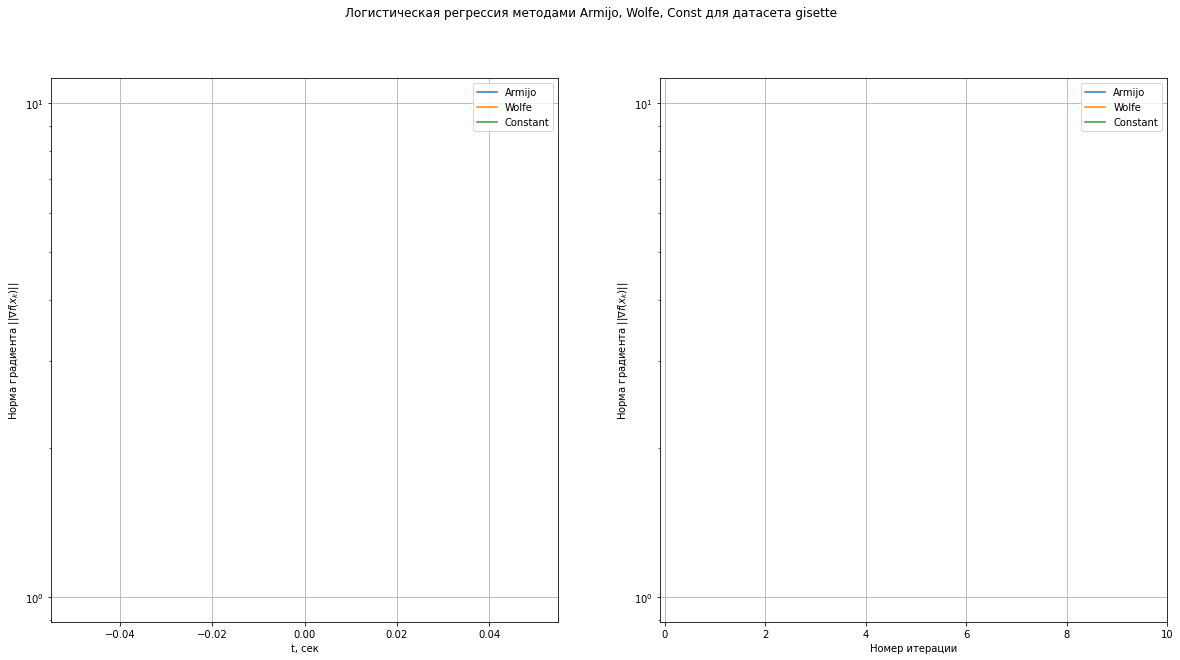

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

title = "Логистическая регрессия методами Armijo, Wolfe, Const для датасета " + dataset

fig.suptitle(title)

ax1.plot(gisette_logreg_1.hist['time'],
         gisette_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax1.plot(gisette_logreg_2.hist['time'],
         gisette_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax1.plot(gisette_logreg_3.hist['time'],
         gisette_logreg_3.hist['grad_norm'],
         label = "Constant")



ax2.plot(gisette_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax2.plot(gisette_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax2.plot(gisette_logreg_3.hist['grad_norm'],
         label = "Constant")



ax1.grid()
ax1.semilogy()
ax1.legend()
ax1.set_xlabel("t, сек")
ax1.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")

ax2.grid()
ax2.legend()
ax2.semilogy()
ax2.set_xlabel("Номер итерации")
ax2.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")


plt.show()

## 4.3 Датасет real-sim

In [59]:
dataset = "real-sim"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Число функций в сумме: ", m, ", размерность задачи: ", n)

Число функций в сумме:  72309 , размерность задачи:  20958


In [60]:
real_sim_oracle = oracles.create_log_reg_oracle(A, y, 1/m)

x_0 = np.random.uniform(-10, 10, size=n)

In [62]:
real_sim_logreg_1 = methods.GradientDescent(oracle=real_sim_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Armijo',
                                                    'alpha_0': 100,
                                                    'c1': 0.3
                                                    })

real_sim_logreg_2 = methods.GradientDescent(oracle=real_sim_oracle, x_0=x_0, 
                                line_search_options={
                                                    'method': 'Wolfe',
                                                    'c2': 0.9,
                                                    'c1': 1e-4
                                                    })

real_sim_logreg_3 = methods.GradientDescent(oracle=real_sim_oracle, x_0=x_0, 
                                line_search_options={'method': 'Constant', 'c': 1})

In [64]:
%%time
real_sim_run_1 = real_sim_logreg_1.run(max_iter=1000)

CPU times: user 5min 50s, sys: 6.32 s, total: 5min 56s
Wall time: 59.5 s


In [65]:
real_sim_run_2 = real_sim_logreg_2.run(max_iter=1000)

In [66]:
real_sim_run_3 = real_sim_logreg_3.run(max_iter=1000)

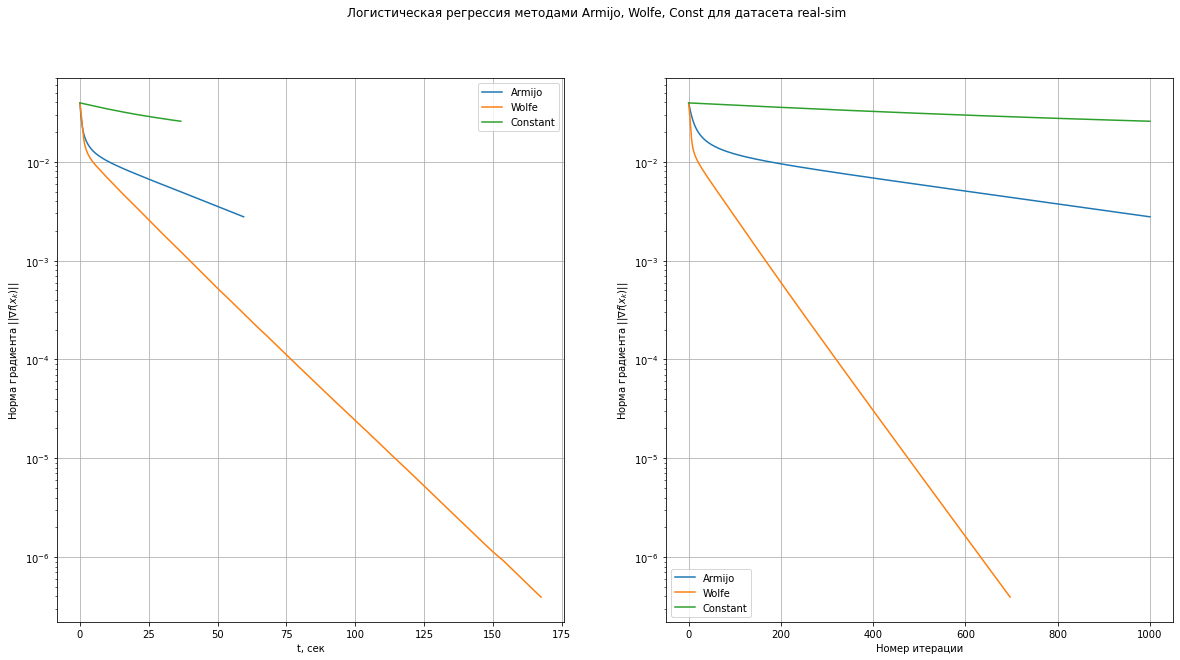

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

title = "Логистическая регрессия методами Armijo, Wolfe, Const для датасета " + dataset

fig.suptitle(title)

ax1.plot(real_sim_logreg_1.hist['time'],
         real_sim_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax1.plot(real_sim_logreg_2.hist['time'],
         real_sim_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax1.plot(real_sim_logreg_3.hist['time'],
         real_sim_logreg_3.hist['grad_norm'],
         label = "Constant")



ax2.plot(real_sim_logreg_1.hist['grad_norm'],
         label = "Armijo")
ax2.plot(real_sim_logreg_2.hist['grad_norm'],
         label = "Wolfe")
ax2.plot(real_sim_logreg_3.hist['grad_norm'],
         label = "Constant")



ax1.grid()
ax1.semilogy()
ax1.legend()
ax1.set_xlabel("t, сек")
ax1.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")

ax2.grid()
ax2.legend()
ax2.semilogy()
ax2.set_xlabel("Номер итерации")
ax2.set_ylabel(r"Норма градиента $|| \nabla f(x_k) ||$")

plt.show()

Wolfe сошелся довольно быстро. Armijo и Const нужно больше итераций. Для данного датасета в порядке убывания методы: Wolfe, Armijo, Const